In [81]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency

In [44]:
df = []
for i in [1,2,3]:
    df.append( pd.read_csv('riskfactor{}.csv'.format(i)) )
df = pd.concat(df)
df.shape

(1522340, 13)

In [77]:
df.corr()

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
year,1.000000,0.031964,-0.015188,-0.021506,-0.016688,-0.027906,-0.169711,0.008089,-0.023082,-0.109039,0.090341,0.059117,-0.022107
age_group_5_years,0.031964,1.000000,-0.065071,-0.057153,-0.038233,-0.073843,-0.064939,0.181155,-0.090125,0.054039,0.050033,0.036120,-0.013721
race_eth,-0.015188,-0.065071,1.000000,0.007470,0.019438,0.031851,-0.004369,-0.065740,-0.000230,0.112384,-0.060776,-0.024709,-0.064949
first_degree_hx,-0.021506,-0.057153,0.007470,1.000000,0.118718,0.110587,0.021992,0.161881,0.061433,0.083855,0.069522,0.206235,-0.025301
age_menarche,-0.016688,-0.038233,0.019438,0.118718,1.000000,0.223545,0.114381,0.015277,0.032839,0.017435,0.007715,0.033692,0.075021
age_first_birth,-0.027906,-0.073843,0.031851,0.110587,0.223545,1.000000,0.133078,0.076792,0.097672,0.079263,0.109429,0.078734,0.063266
BIRADS_breast_density,-0.169711,-0.064939,-0.004369,0.021992,0.114381,0.133078,1.000000,0.003074,0.032377,0.000946,0.022421,-0.016639,-0.002763
current_hrt,0.008089,0.181155,-0.065740,0.161881,0.015277,0.076792,0.003074,1.000000,0.243283,0.137626,0.179479,0.481485,-0.052179
menopaus,-0.023082,-0.090125,-0.000230,0.061433,0.032839,0.097672,0.032377,0.243283,1.000000,0.085566,0.083364,0.128683,-0.025199
bmi_group,-0.109039,0.054039,0.112384,0.083855,0.017435,0.079263,0.000946,0.137626,0.085566,1.000000,0.081723,0.178907,0.018981


In [48]:
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)  # Create a contingency table
    chi2, _, _, _ = chi2_contingency(contingency_table)  # Perform Chi-Square test
    n = contingency_table.sum().sum()  # Total number of observations
    phi2 = chi2 / n
    r, k = contingency_table.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))  # Bias correction
    rcorr = r - ((r - 1)**2 / (n - 1))
    kcorr = k - ((k - 1)**2 / (n - 1))
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [61]:
categorical_columns = ['age_group_5_years', 'race_eth', 'first_degree_hx',
       'age_menarche', 'age_first_birth', 'BIRADS_breast_density',
       'current_hrt', 'menopaus', 'bmi_group', 'biophx',
       'breast_cancer_history']

corr_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        corr_matrix.loc[col1, col2] = 1.0  if col1 == col2 else cramers_v(df[col1], df[col2])

corr_matrix = corr_matrix.astype(float)

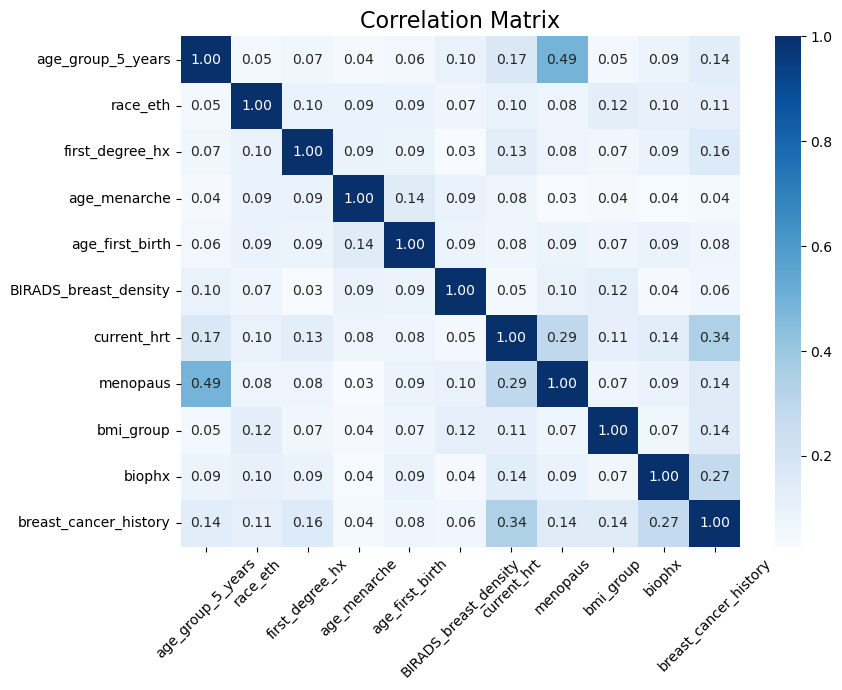

In [73]:
plt.figure(figsize=(9, 7))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    cbar=True,
    xticklabels=corr_matrix.columns,
    yticklabels=corr_matrix.index
)

plt.title("Correlation Matrix", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
# Age (years) in 5 year groups
age_map = {
    1 : '18-29 yrs',
    2 : '30-34 yrs',
    3 : '35-39 yrs',
    5 : '40-44 yrs',
    6 : '45-49 yrs',
    7 : '50-54 yrs',
    8 : '55-59 yrs',
    9 : '60-64 yrs',
    10 : '65-69 yrs',
    11 : '70-74 yrs',
    12 : '75-79 yrs',
    13 : '85+ yrs',
}
df.age_group_5_years = df.age_group_5_years.map(age_map)
df.age_group_5_years.value_counts()

age_group_5_years
50-54 yrs    254196
45-49 yrs    252910
40-44 yrs    189193
55-59 yrs    161787
60-64 yrs    147137
65-69 yrs    121621
70-74 yrs     94178
75-79 yrs     65772
35-39 yrs     48629
85+ yrs       41426
30-34 yrs     19573
18-29 yrs      5895
Name: count, dtype: int64

In [5]:
# Race/ethnicity
race_map = {
    1 : 'Non-Hispanic white',
    2 : 'Non-Hispanic black',
    3 : 'Asian/Pacific Islander',
    4 : 'Native American',
    5 : 'Hispanic',
    6 : 'Other/mixed',
    9 : 'Unknown',
}
df.race_eth = df.race_eth.map(race_map)
df.race_eth.value_counts()

race_eth
Non-Hispanic white        721859
Non-Hispanic black        255476
Asian/Pacific Islander    179926
Hispanic                  177069
Unknown                    98329
Other/mixed                73176
Native American            16505
Name: count, dtype: int64

In [6]:
# History of breast cancer in a first degree relative
first_degree_map = {
    0 : 'No',
    1 : 'Yes',
    9 : 'Unknown',
}
df.first_degree_hx = df.first_degree_hx.map(first_degree_map)
df.first_degree_hx.value_counts()

first_degree_hx
No         1021577
Yes         412533
Unknown      88230
Name: count, dtype: int64

In [7]:
# Age (years) at menarche
menarche_map = {
    0 : 'Age >14',
    1 : 'Age 12-13',
    2 : 'Age <12',
    9 : 'Unknown',
}
df.age_menarche = df.age_menarche.map(menarche_map)
df.age_menarche.value_counts()

age_menarche
Unknown      688431
Age 12-13    366212
Age >14      256545
Age <12      211152
Name: count, dtype: int64

In [8]:
# Age (years) at first birth
first_birth_map = {
    0 : 'Age < 20',
    1 : 'Age 20-24',
    2 : 'Age 25-29',
    3 : 'Age >30',
    4 : 'Nulliparous',
    9 : 'Unknown',
}
df.age_first_birth = df.age_first_birth.map(first_birth_map)
df.age_first_birth.value_counts()

age_first_birth
Unknown        331803
Nulliparous    266471
Age 20-24      257723
Age < 20       234530
Age >30        220720
Age 25-29      211093
Name: count, dtype: int64

In [9]:
# BI-RADS breast density
bdensity_map = {
    1 : 'Almost entirely fat',
    2 : 'Scattered fibroglandular densities',
    3 : 'Heterogeneously dense',
    4 : 'Extremely dense',
    9 : 'Unknown',
}
df.BIRADS_breast_density = df.BIRADS_breast_density.map(bdensity_map)
df.BIRADS_breast_density.value_counts()

BIRADS_breast_density
Scattered fibroglandular densities    514025
Heterogeneously dense                 479803
Almost entirely fat                   191893
Unknown                               179011
Extremely dense                       157608
Name: count, dtype: int64

In [10]:
# Use of hormone replacement therapy
current_hrt_map = {
    0 : 'No',
    1 : 'Yes',
    9 : 'Unknown',
}
df.current_hrt = df.current_hrt.map(current_hrt_map)
df.current_hrt.value_counts()

current_hrt
No         1087606
Unknown     313776
Yes         120958
Name: count, dtype: int64

In [11]:
# Menopausal status
menopaus_map = {
    1 : 'Pre or peri-menopausal',
    2 : 'Post-menopausal',
    3 : 'Surgical menopause',
    9 : 'Unknown',
}
df.menopaus = df.menopaus.map(menopaus_map)
df.menopaus.value_counts()

menopaus
Post-menopausal           881210
Pre or peri-menopausal    343344
Unknown                   168892
Surgical menopause        128894
Name: count, dtype: int64

In [12]:
# Body mass index (kg/m2)
bmi_map = {
    1 : '10-24.99',
    2 : '25-29.99',
    3 : '30-34.99',
    4 : '35+',
    9 : 'Unknown',
}
df.bmi_group = df.bmi_group.map(bmi_map)
df.bmi_group.value_counts()

bmi_group
Unknown     459438
10-24.99    351790
25-29.99    312333
30-34.99    218781
35+         179998
Name: count, dtype: int64

In [13]:
# Previous breast biopsy or aspiration
biophx_map = {
    0 : 'No',
    1 : 'Yes',
    9 : 'Unknown',
}
df.biophx = df.biophx.map(biophx_map)
df.biophx.value_counts()

biophx
No         898839
Yes        559834
Unknown     63667
Name: count, dtype: int64

In [14]:
# Prior breast cancer diagnosis
history_map = {
    0 : 'No',
    1 : 'Yes',
    9 : 'Unknown',
}
df.breast_cancer_history = df.breast_cancer_history.map(history_map)
df.breast_cancer_history.value_counts()

breast_cancer_history
No         969662
Unknown    330902
Yes        221776
Name: count, dtype: int64

In [15]:
unknown_idx = df[(df[df.columns.difference(['year', 'count', 'age_group_5_years'])] == 'Unknown').all(1)].index
df = df.drop(index = unknown_idx)
df.shape

(1522223, 13)

In [32]:
df.head()

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
0,2005,18-29 yrs,Non-Hispanic white,No,Age >14,Age < 20,Scattered fibroglandular densities,No,Pre or peri-menopausal,Unknown,No,No,2
1,2005,18-29 yrs,Non-Hispanic white,No,Age >14,Age < 20,Extremely dense,No,Pre or peri-menopausal,10-24.99,No,No,1
2,2005,18-29 yrs,Non-Hispanic white,No,Age >14,Age < 20,Extremely dense,No,Pre or peri-menopausal,25-29.99,No,No,1
3,2005,18-29 yrs,Non-Hispanic white,No,Age >14,Age < 20,Extremely dense,No,Pre or peri-menopausal,Unknown,No,No,2
4,2005,18-29 yrs,Non-Hispanic white,No,Age >14,Age 20-24,Extremely dense,No,Pre or peri-menopausal,35+,No,No,1
